In [3]:
###EDA!!!

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import copy
import seaborn as sns

In [4]:
remarks_supp_opp = pd.read_csv("prml20/remarks_supp_opp.csv")
tr = pd.read_csv("prml20/train.csv")
test = pd.read_csv("prml20/test.csv")
remarks = pd.read_csv("prml20/remarks.csv")
ratings = pd.read_csv("prml20/ratings.csv")

remarks=remarks.drop_duplicates()
remarks = remarks.dropna()

remarks_supp_opp=remarks_supp_opp.drop_duplicates()
remarks_supp_opp = remarks_supp_opp.dropna()



In [5]:
##Company ratings
##Check whether ratings has all companies. It misses out one company, which is there in remarks_supp_opp, verified from the line below
print(set(remarks_supp_opp["comp"].unique()).issubset(set(ratings["comp"].unique())))
comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

print(comp_list)

data = {"comp":comp_list}
comp_data = pd.DataFrame(data)
comp_data['TotNumEmployees'] = comp_data["comp"]
comp_data['AvgRating'] = comp_data["comp"]
comp_data['TotRating'] = comp_data["comp"]
comp_data['NumRating'] = comp_data["comp"]
comp_data['SuppOppMean']   = comp_data["comp"]
comp_data['NumLeft']   = comp_data["comp"]
comp_data['NumRemaining'] = comp_data["comp"]
comp_data['FracLeft'] = comp_data["comp"]

comp_data['NumReviewJan'] = comp_data["comp"]
comp_data['NumReviewFeb'] = comp_data["comp"]
comp_data['NumReviewMar'] = comp_data["comp"]
comp_data['NumReviewApr'] = comp_data["comp"]
comp_data['NumReviewMay'] = comp_data["comp"]
comp_data['NumReviewJun'] = comp_data["comp"]
comp_data['NumReviewJul'] = comp_data["comp"]
comp_data['NumReviewAug'] = comp_data["comp"]
comp_data['NumReviewSep'] = comp_data["comp"]
comp_data['NumReviewOct'] = comp_data["comp"]
comp_data['NumReviewNov'] = comp_data["comp"]
comp_data['NumReviewDec'] = comp_data["comp"]

comp_data['ReviewJan'] = comp_data["comp"]
comp_data['ReviewFeb'] = comp_data["comp"]
comp_data['ReviewMar'] = comp_data["comp"]
comp_data['ReviewApr'] = comp_data["comp"]
comp_data['ReviewMay'] = comp_data["comp"]
comp_data['ReviewJun'] = comp_data["comp"]
comp_data['ReviewJul'] = comp_data["comp"]
comp_data['ReviewAug'] = comp_data["comp"]
comp_data['ReviewSep'] = comp_data["comp"]
comp_data['ReviewOct'] = comp_data["comp"]
comp_data['ReviewNov'] = comp_data["comp"]
comp_data['ReviewDec'] = comp_data["comp"]

comp_data['NumRemarkJan'] = comp_data["comp"]
comp_data['NumRemarkFeb'] = comp_data["comp"]
comp_data['NumRemarkMar'] = comp_data["comp"]
comp_data['NumRemarkApr'] = comp_data["comp"]
comp_data['NumRemarkMay'] = comp_data["comp"]
comp_data['NumRemarkJun'] = comp_data["comp"]
comp_data['NumRemarkJul'] = comp_data["comp"]
comp_data['NumRemarkAug'] = comp_data["comp"]
comp_data['NumRemarkSep'] = comp_data["comp"]
comp_data['NumRemarkOct'] = comp_data["comp"]
comp_data['NumRemarkNov'] = comp_data["comp"]
comp_data['NumRemarkDec'] = comp_data["comp"]

comp_data['LenRemarkJan'] = comp_data["comp"]
comp_data['LenRemarkFeb'] = comp_data["comp"]
comp_data['LenRemarkMar'] = comp_data["comp"]
comp_data['LenRemarkApr'] = comp_data["comp"]
comp_data['LenRemarkMay'] = comp_data["comp"]
comp_data['LenRemarkJun'] = comp_data["comp"]
comp_data['LenRemarkJul'] = comp_data["comp"]
comp_data['LenRemarkAug'] = comp_data["comp"]
comp_data['LenRemarkSep'] = comp_data["comp"]
comp_data['LenRemarkOct'] = comp_data["comp"]
comp_data['LenRemarkNov'] = comp_data["comp"]
comp_data['LenRemarkDec'] = comp_data["comp"]

for i in range(len(comp_data['comp'])):
    Arr_emp_of_comp = ratings[ratings["comp"] == comp_list[i]]["emp"].append(tr[tr["comp"]==comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks[remarks["comp"] == comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks_supp_opp[remarks_supp_opp["comp"] == comp_list[i]]["emp"])
    comp_data['TotNumEmployees'].iloc[i] = Arr_emp_of_comp.unique().shape[0]
    comp_data['AvgRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].mean()
    comp_data['TotRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].sum()
    comp_data['NumRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]].shape[0]
    comp_data['SuppOppMean'].iloc[i]   = remarks_supp_opp[(remarks_supp_opp["comp"] == comp_list[i])]["support"].mean()
    comp_data['NumLeft'].iloc[i]   = tr[tr["comp"] == comp_list[i]]["left"].sum()
    comp_data['NumRemaining'].iloc[i] = Arr_emp_of_comp.unique().shape[0] - tr[tr["comp"] == comp_list[i]]["left"].sum()
    comp_data['FracLeft'].iloc[i] = tr[tr["comp"] == comp_list[i]]["left"].sum() / Arr_emp_of_comp.unique().shape[0]
    
    comp_data['NumReviewJan'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1)]["rating"].shape[0]
    comp_data['NumReviewFeb'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==2)]["rating"].shape[0]
    comp_data['NumReviewMar'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==3)]["rating"].shape[0]
    comp_data['NumReviewApr'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==4)]["rating"].shape[0]
    comp_data['NumReviewMay'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==5)]["rating"].shape[0]
    comp_data['NumReviewJun'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==6)]["rating"].shape[0]
    comp_data['NumReviewJul'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==7)]["rating"].shape[0]
    comp_data['NumReviewAug'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==8)]["rating"].shape[0]
    comp_data['NumReviewSep'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==9)]["rating"].shape[0]
    comp_data['NumReviewOct'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==10)]["rating"].shape[0]
    comp_data['NumReviewNov'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==11)]["rating"].shape[0]
    comp_data['NumReviewDec'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==12)]["rating"].shape[0]
    
    comp_data['ReviewJan'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1)]["rating"].mean()
    comp_data['ReviewFeb'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==2)]["rating"].mean()
    comp_data['ReviewMar'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==3)]["rating"].mean()
    comp_data['ReviewApr'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==4)]["rating"].mean()
    comp_data['ReviewMay'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==5)]["rating"].mean()
    comp_data['ReviewJun'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==6)]["rating"].mean()
    comp_data['ReviewJul'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==7)]["rating"].mean()
    comp_data['ReviewAug'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==8)]["rating"].mean()
    comp_data['ReviewSep'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==9)]["rating"].mean()
    comp_data['ReviewOct'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==10)]["rating"].mean()
    comp_data['ReviewNov'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==11)]["rating"].mean()
    comp_data['ReviewDec'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==12)]["rating"].mean()
    
    comp_data['NumRemarkJan'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"].shape[0]
    comp_data['NumRemarkFeb'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==2)]["txt"].shape[0]
    comp_data['NumRemarkMar'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==3)]["txt"].shape[0]
    comp_data['NumRemarkApr'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==4)]["txt"].shape[0]
    comp_data['NumRemarkMay'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==5)]["txt"].shape[0]
    comp_data['NumRemarkJun'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==6)]["txt"].shape[0]
    comp_data['NumRemarkJul'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==7)]["txt"].shape[0]
    comp_data['NumRemarkAug'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==8)]["txt"].shape[0]
    comp_data['NumRemarkSep'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==9)]["txt"].shape[0]
    comp_data['NumRemarkOct'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==10)]["txt"].shape[0]
    comp_data['NumRemarkNov'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==11)]["txt"].shape[0]
    comp_data['NumRemarkDec'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==12)]["txt"].shape[0]
    
    comp_data['LenRemarkJan'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"])))
    comp_data['LenRemarkFeb'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==2)]["txt"])))
    comp_data['LenRemarkMar'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==3)]["txt"])))
    comp_data['LenRemarkApr'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==4)]["txt"])))
    comp_data['LenRemarkMay'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==5)]["txt"])))
    comp_data['LenRemarkJun'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==6)]["txt"])))
    comp_data['LenRemarkJul'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==7)]["txt"])))
    comp_data['LenRemarkAug'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==8)]["txt"])))
    comp_data['LenRemarkSep'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==9)]["txt"])))
    comp_data['LenRemarkOct'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==10)]["txt"])))
    comp_data['LenRemarkNov'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==11)]["txt"])))
    comp_data['LenRemarkDec'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==12)]["txt"])))
comp_data

True
['azalutpt' 'bhqczwkj' 'bnivzbfi' 'bucyzegb' 'dmgwoqhz' 'ejeyobsm'
 'ewpvmfbc' 'fjslutlg' 'fqsozvpv' 'iqdwmigj' 'jblrepyr' 'jnvpfmup'
 'lgqwnfsg' 'lydqevjo' 'nmxkgvmi' 'ocsicwng' 'oecfwdaq' 'ojidyfnn'
 'oqvaqcak' 'pfmjacpm' 'phcvroct' 'pkeebtfe' 'rcwkfavv' 'rcyiinms'
 'rujnkvse' 'siexkzzo' 'spfcrgea' 'ugldwwzf' 'ujplihug' 'vcqsbirc'
 'vwcdylha' 'wsmblohy' 'xccmgbjz' 'ydqdpmvi' 'ylpksopb' 'yodaczsb'
 'zptfoxyq']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:112: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:115: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/l

,comp,TotNumEmployees,AvgRating,TotRating,NumRating,SuppOppMean,NumLeft,NumRemaining,FracLeft,NumReviewJan,...,LenRemarkMar,LenRemarkApr,LenRemarkMay,LenRemarkJun,LenRemarkJul,LenRemarkAug,LenRemarkSep,LenRemarkOct,LenRemarkNov,LenRemarkDec
0,azalutpt,10,3.45652,159,46,NaN,0,10,0,4,...,1,1,1,1,1,1,1,1,1,1
1,bhqczwkj,265,3.08928,18063,5847,0.906019,7,258,0.0264151,731,...,1,1,1,1,1,1,1,1,1,1
2,bnivzbfi,356,3.23647,86595,26756,0.795631,18,338,0.0505618,2491,...,33310,19841,27391,32187,37537,24947,27202,49773,50920,34946
3,bucyzegb,9,3.39623,180,53,0.727273,0,9,0,0,...,1,1,1,1,1,1,1,1,1,1
4,dmgwoqhz,48,3.47532,11545,3322,0.962144,1,47,0.0208333,401,...,1,1,1,1,1,1,1,1,1,1
5,ejeyobsm,101,2.84384,15206,5347,0.788495,0,101,0,424,...,1,1,1,1,1,1,1,1,1,1
6,ewpvmfbc,169,2.64353,9522,3602,0.876229,8,161,0.0473373,127,...,13255,18985,2298,2099,2124,2523,2460,2967,3713,12880
7,fjslutlg,9,3.66667,55,15,NaN,0,9,0,0,...,1,1,1,1,1,1,1,1,1,1
8,fqsozvpv,60,2.77778,175,63,0.960725,0,60,0,0,...,1,1,1,1,1,1,1,1,1,1
9,iqdwmigj,142,2.48749,10338,4156,0.845769,4,138,0.028169,1046,...,41814,26196,41383,5999,5096,4043,4586,2181,2845,5216


In [6]:
## Create Company wise Dataframes, to make things easy(quicker) to preprocess

#emp_list = ratings["emp"].unique()
#comp_list = ratings["comp"].unique()

comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

df_comp_RatingOfEmp = {}
df_comp_RemarkOfEmp = {}
df_comp_SupOppOfEmp = {}
for i in comp_list:
    df_comp_RatingOfEmp[i] = ratings[ratings["comp"] == i]
    df_comp_RemarkOfEmp[i] = remarks[remarks["comp"] == i]
    df_comp_SupOppOfEmp[i] = remarks_supp_opp[remarks_supp_opp["comp"] == i]

df_comp_RatingOfEmp["phcvroct"]

,emp,comp,Date,rating
56689,47,phcvroct,12-02-2015,1
56690,3,phcvroct,21-02-2015,1
56691,20,phcvroct,24-02-2015,1
56692,54,phcvroct,24-02-2015,1
56693,66,phcvroct,24-02-2015,1
...,...,...,...,...
107163,956,phcvroct,20-03-2017,4
107164,64,phcvroct,20-03-2017,4
107165,79,phcvroct,20-03-2017,4
107166,162,phcvroct,20-03-2017,4


In [7]:
tr["lastratingdate"] = pd.to_datetime(tr["lastratingdate"])
ratings["Date"] = pd.to_datetime(ratings["Date"])
remarks["remarkDate"] = pd.to_datetime(remarks["remarkDate"])

tr_modified = copy.deepcopy(tr)
test_modified = copy.deepcopy(test)

tr_modified["cumm_rating"] = tr_modified["left"]
test_modified["cumm_rating"]= test_modified["emp"]
tr_modified["satisfied"] = tr_modified["left"]
test_modified["satisfied"]= test_modified["emp"]
tr_modified["unsatisfied"] = tr_modified["left"]
test_modified["unsatisfied"]= test_modified["emp"]
tr_modified["no_of_ratings"] = tr_modified["left"]
test_modified["no_of_ratings"]= test_modified["emp"]
tr_modified["supp_opp"] = tr_modified["left"]
test_modified["supp_opp"]= test_modified["emp"]
tr_modified["Numsupp_opp"] = tr_modified["left"]
test_modified["Numsupp_opp"]= test_modified["emp"]
tr_modified["year"] = pd.DatetimeIndex(tr["lastratingdate"]).year
test_modified["year"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).year
tr_modified["month"] = pd.DatetimeIndex(tr["lastratingdate"]).month
test_modified["month"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).month
tr_modified["day"] = pd.DatetimeIndex(tr["lastratingdate"]).day
test_modified["day"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).day

tr_modified["average_len_remark"] = tr_modified["left"]
test_modified["average_len_remark"] = test_modified["emp"]
'''
tr_modified["CompTNE"] = tr_modified["left"]
test_modified["CompTNE"]= test_modified["emp"]
tr_modified["CompAvgRating"] = tr_modified["left"]
test_modified["CompAvgRating"]= test_modified["emp"]
tr_modified["CompTotRating"] = tr_modified["left"]
test_modified["CompTotRating"]= test_modified["emp"]
tr_modified["CompNumRating"] = tr_modified["left"]
test_modified["CompNumRating"]= test_modified["emp"]
tr_modified["CompSuppOppMean"] = tr_modified["left"]
test_modified["CompSuppOppMean"]= test_modified["emp"]

tr_modified["CompNumLeft"] = tr_modified["left"]
test_modified["CompNumLeft"]= test_modified["emp"]
tr_modified["CompNumRemaining"] = tr_modified["left"]
test_modified["CompNumRemaining"]= test_modified["emp"]
tr_modified["CompFracLeft"] = tr_modified["left"]
test_modified["CompFracLeft"]= test_modified["emp"]

tr_modified['CompNumReviewJan'] = tr_modified["left"]
tr_modified['CompNumReviewFeb'] = tr_modified["left"]
tr_modified['CompNumReviewMar'] = tr_modified["left"]
tr_modified['CompNumReviewApr'] = tr_modified["left"]
tr_modified['CompNumReviewMay'] = tr_modified["left"]
tr_modified['CompNumReviewJun'] = tr_modified["left"]
tr_modified['CompNumReviewJul'] = tr_modified["left"]
tr_modified['CompNumReviewAug'] = tr_modified["left"]
tr_modified['CompNumReviewSep'] = tr_modified["left"]
tr_modified['CompNumReviewOct'] = tr_modified["left"]
tr_modified['CompNumReviewNov'] = tr_modified["left"]
tr_modified['CompNumReviewDec'] = tr_modified["left"]

tr_modified['CompReviewJan'] = tr_modified["left"]
tr_modified['CompReviewFeb'] = tr_modified["left"]
tr_modified['CompReviewMar'] = tr_modified["left"]
tr_modified['CompReviewApr'] = tr_modified["left"]
tr_modified['CompReviewMay'] = tr_modified["left"]
tr_modified['CompReviewJun'] = tr_modified["left"]
tr_modified['CompReviewJul'] = tr_modified["left"]
tr_modified['CompReviewAug'] = tr_modified["left"]
tr_modified['CompReviewSep'] = tr_modified["left"]
tr_modified['CompReviewOct'] = tr_modified["left"]
tr_modified['CompReviewNov'] = tr_modified["left"]
tr_modified['CompReviewDec'] = tr_modified["left"]

tr_modified['CompNumRemarkJan'] = tr_modified["left"]
tr_modified['CompNumRemarkFeb'] = tr_modified["left"]
tr_modified['CompNumRemarkMar'] = tr_modified["left"]
tr_modified['CompNumRemarkApr'] = tr_modified["left"]
tr_modified['CompNumRemarkMay'] = tr_modified["left"]
tr_modified['CompNumRemarkJun'] = tr_modified["left"]
tr_modified['CompNumRemarkJul'] = tr_modified["left"]
tr_modified['CompNumRemarkAug'] = tr_modified["left"]
tr_modified['CompNumRemarkSep'] = tr_modified["left"]
tr_modified['CompNumRemarkOct'] = tr_modified["left"]
tr_modified['CompNumRemarkNov'] = tr_modified["left"]
tr_modified['CompNumRemarkDec'] = tr_modified["left"]

tr_modified['CompLenRemarkJan'] = tr_modified["left"]
tr_modified['CompLenRemarkFeb'] = tr_modified["left"]
tr_modified['CompLenRemarkMar'] = tr_modified["left"]
tr_modified['CompLenRemarkApr'] = tr_modified["left"]
tr_modified['CompLenRemarkMay'] = tr_modified["left"]
tr_modified['CompLenRemarkJun'] = tr_modified["left"]
tr_modified['CompLenRemarkJul'] = tr_modified["left"]
tr_modified['CompLenRemarkAug'] = tr_modified["left"]
tr_modified['CompLenRemarkSep'] = tr_modified["left"]
tr_modified['CompLenRemarkOct'] = tr_modified["left"]
tr_modified['CompLenRemarkNov'] = tr_modified["left"]
tr_modified['CompLenRemarkDec'] = tr_modified["left"]

test_modified['CompNumReviewJan'] = test_modified["emp"]
test_modified['CompNumReviewFeb'] = test_modified["emp"]
test_modified['CompNumReviewMar'] = test_modified["emp"]
test_modified['CompNumReviewApr'] = test_modified["emp"]
test_modified['CompNumReviewMay'] = test_modified["emp"]
test_modified['CompNumReviewJun'] = test_modified["emp"]
test_modified['CompNumReviewJul'] = test_modified["emp"]
test_modified['CompNumReviewAug'] = test_modified["emp"]
test_modified['CompNumReviewSep'] = test_modified["emp"]
test_modified['CompNumReviewOct'] = test_modified["emp"]
test_modified['CompNumReviewNov'] = test_modified["emp"]
test_modified['CompNumReviewDec'] = test_modified["emp"]

test_modified['CompReviewJan'] = test_modified["emp"]
test_modified['CompReviewFeb'] = test_modified["emp"]
test_modified['CompReviewMar'] = test_modified["emp"]
test_modified['CompReviewApr'] = test_modified["emp"]
test_modified['CompReviewMay'] = test_modified["emp"]
test_modified['CompReviewJun'] = test_modified["emp"]
test_modified['CompReviewJul'] = test_modified["emp"]
test_modified['CompReviewAug'] = test_modified["emp"]
test_modified['CompReviewSep'] = test_modified["emp"]
test_modified['CompReviewOct'] = test_modified["emp"]
test_modified['CompReviewNov'] = test_modified["emp"]
test_modified['CompReviewDec'] = test_modified["emp"]

test_modified['CompNumRemarkJan'] = test_modified["emp"]
test_modified['CompNumRemarkFeb'] = test_modified["emp"]
test_modified['CompNumRemarkMar'] = test_modified["emp"]
test_modified['CompNumRemarkApr'] = test_modified["emp"]
test_modified['CompNumRemarkMay'] = test_modified["emp"]
test_modified['CompNumRemarkJun'] = test_modified["emp"]
test_modified['CompNumRemarkJul'] = test_modified["emp"]
test_modified['CompNumRemarkAug'] = test_modified["emp"]
test_modified['CompNumRemarkSep'] = test_modified["emp"]
test_modified['CompNumRemarkOct'] = test_modified["emp"]
test_modified['CompNumRemarkNov'] = test_modified["emp"]
test_modified['CompNumRemarkDec'] = test_modified["emp"]

test_modified['CompLenRemarkJan'] = test_modified["emp"]
test_modified['CompLenRemarkFeb'] = test_modified["emp"]
test_modified['CompLenRemarkMar'] = test_modified["emp"]
test_modified['CompLenRemarkApr'] = test_modified["emp"]
test_modified['CompLenRemarkMay'] = test_modified["emp"]
test_modified['CompLenRemarkJun'] = test_modified["emp"]
test_modified['CompLenRemarkJul'] = test_modified["emp"]
test_modified['CompLenRemarkAug'] = test_modified["emp"]
test_modified['CompLenRemarkSep'] = test_modified["emp"]
test_modified['CompLenRemarkOct'] = test_modified["emp"]
test_modified['CompLenRemarkNov'] = test_modified["emp"]
test_modified['CompLenRemarkDec'] = test_modified["emp"]
'''
tr_modified["num_opp"] = tr_modified["left"]
test_modified["num_opp"] =test_modified["emp"]

tr_modified["num_supp"] = tr_modified["left"]
test_modified["num_supp"] = test_modified["emp"]

tr_modified["num_remark"] = tr_modified["left"]
test_modified["num_remark"] = test_modified["emp"]

In [8]:
import time
t1 = time.time()
for i in range(tr.shape[0]):
    #print(i)
    emp = tr_modified["emp"].iloc[i]
    comp = tr_modified["comp"].iloc[i]
    last_date = tr_modified["lastratingdate"].iloc[i]
    #emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (pd.to_datetime(df_comp_RatingOfEmp[comp]["Date"]) <= last_date)]
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp)]
    #print(np.where(emp_rating["rating"]==4)[0], np.where(emp_rating==4)[0]==[])
    tr_modified["cumm_rating"].iloc[i] = emp_rating["rating"].mean()
    if(np.where(emp_rating["rating"]==4)[0]!=[]):
        tr_modified["satisfied"].iloc[i] = (np.where(emp_rating["rating"]==4)[0].shape[0])/emp_rating.shape[0]
        #tr_modified["unsatisfied"].iloc[i] = (np.where(emp_rating["rating"]<3)[0].shape[0])/emp_rating.shape[0]
    else:
        tr_modified["satisfied"].iloc[i] = -1
        #tr_modified["unsatisfied"].iloc[i] = -1
    #print(emp_rating["rating"])
    if(np.where(emp_rating["rating"]<3)[0]!=[]):
        #tr_modified["satisfied"].iloc[i] = (np.where(emp_rating["rating"]==4)[0].shape[0])/emp_rating.shape[0]
        tr_modified["unsatisfied"].iloc[i] = (np.where(emp_rating["rating"]<3)[0].shape[0])/emp_rating.shape[0]
    else:
        #tr_modified["satisfied"].iloc[i] = -1
        tr_modified["unsatisfied"].iloc[i] = -1
    tr_modified["no_of_ratings"].iloc[i] = emp_rating.shape[0]
    
    tr_modified["supp_opp"].iloc[i] = (df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"]).astype(int).mean()
    tr_modified["Numsupp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].shape[0]
    
    
    tr_modified["num_supp"].iloc[i] = len(df_comp_SupOppOfEmp[comp][(df_comp_SupOppOfEmp[comp]["emp"] == emp) & (df_comp_SupOppOfEmp[comp]["support"] == True)])
    tr_modified["num_opp"].iloc[i] = len(df_comp_SupOppOfEmp[comp][(df_comp_SupOppOfEmp[comp]["emp"] == emp) & (df_comp_SupOppOfEmp[comp]["oppose"] == True)])
    tr_modified["num_remark"].iloc[i] = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"].shape[0]
    
    b = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] == emp)]["txt"].shape[0]    
    a = np.sum(df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"]) 
    if a==0:
        tr_modified["average_len_remark"].iloc[i] = 0
    else:
        tr_modified["average_len_remark"].iloc[i] = len(a)/b

    
    '''
    tr_modified["CompTNE"].iloc[i] = float(comp_data["TotNumEmployees"].loc[comp_data["comp"]==comp])
    tr_modified["CompAvgRating"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompTotRating"].iloc[i] = float(comp_data["TotRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumRating"].iloc[i] = float(comp_data["NumRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompSuppOppMean"].iloc[i] = float(comp_data["SuppOppMean"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumLeft"].iloc[i] = float(comp_data["NumLeft"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumRemaining"].iloc[i] = float(comp_data["NumRemaining"].loc[comp_data["comp"]==comp])
    tr_modified["CompFracLeft"].iloc[i] = float(comp_data["FracLeft"].loc[comp_data["comp"]==comp])
    
    tr_modified['CompNumReviewJan'].iloc[i] = float(comp_data["NumReviewJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewFeb'].iloc[i] = float(comp_data["NumReviewFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewMar'].iloc[i] = float(comp_data["NumReviewMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewApr'].iloc[i] = float(comp_data["NumReviewApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewMay'].iloc[i] = float(comp_data["NumReviewMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewJun'].iloc[i] = float(comp_data["NumReviewJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewJul'].iloc[i] = float(comp_data["NumReviewJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewAug'].iloc[i] = float(comp_data["NumReviewAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewSep'].iloc[i] = float(comp_data["NumReviewSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewOct'].iloc[i] = float(comp_data["NumReviewOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewNov'].iloc[i] = float(comp_data["NumReviewNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewDec'].iloc[i] = float(comp_data["NumReviewDec"].loc[comp_data["comp"]==comp])

    tr_modified['CompReviewJan'].iloc[i] = float(comp_data["ReviewJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewFeb'].iloc[i] = float(comp_data["ReviewFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewMar'].iloc[i] = float(comp_data["ReviewMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewApr'].iloc[i] = float(comp_data["ReviewApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewMay'].iloc[i] = float(comp_data["ReviewMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewJun'].iloc[i] = float(comp_data["ReviewJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewJul'].iloc[i] = float(comp_data["ReviewJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewAug'].iloc[i] = float(comp_data["ReviewAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewSep'].iloc[i] = float(comp_data["ReviewSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewOct'].iloc[i] = float(comp_data["ReviewOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewNov'].iloc[i] = float(comp_data["ReviewNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewDec'].iloc[i] = float(comp_data["ReviewDec"].loc[comp_data["comp"]==comp])
    
    tr_modified['CompNumRemarkJan'].iloc[i] = float(comp_data["NumRemarkJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkFeb'].iloc[i] = float(comp_data["NumRemarkFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkMar'].iloc[i] = float(comp_data["NumRemarkMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkApr'].iloc[i] = float(comp_data["NumRemarkApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkMay'].iloc[i] = float(comp_data["NumRemarkMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkJun'].iloc[i] = float(comp_data["NumRemarkJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkJul'].iloc[i] = float(comp_data["NumRemarkJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkAug'].iloc[i] = float(comp_data["NumRemarkAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkSep'].iloc[i] = float(comp_data["NumRemarkSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkOct'].iloc[i] = float(comp_data["NumRemarkOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkNov'].iloc[i] = float(comp_data["NumRemarkNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkDec'].iloc[i] = float(comp_data["NumRemarkDec"].loc[comp_data["comp"]==comp])
    
    tr_modified['CompLenRemarkJan'].iloc[i] = float(comp_data["LenRemarkJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkFeb'].iloc[i] = float(comp_data["LenRemarkFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkMar'].iloc[i] = float(comp_data["LenRemarkMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkApr'].iloc[i] = float(comp_data["LenRemarkApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkMay'].iloc[i] = float(comp_data["LenRemarkMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkJun'].iloc[i] = float(comp_data["LenRemarkJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkJul'].iloc[i] = float(comp_data["LenRemarkJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkAug'].iloc[i] = float(comp_data["LenRemarkAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkSep'].iloc[i] = float(comp_data["LenRemarkSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkOct'].iloc[i] = float(comp_data["LenRemarkOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkNov'].iloc[i] = float(comp_data["LenRemarkNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkDec'].iloc[i] = float(comp_data["LenRemarkDec"].loc[comp_data["comp"]==comp])
    '''
t2 = time.time()
print(t2-t1)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will ra

176.12875604629517


In [9]:
tr_modified = tr_modified.fillna(0.8521361472764343)
test_modified = test_modified.fillna(0.8521361472764343)
#map_comp = {}
#for l in np.unique(tr_modified["comp"]):
#    tot = tr_modified[tr_modified["comp"]==l].shape[0]
#    yes_left = tr_modified[(tr_modified["comp"]==l)&(tr_modified["left"]==1)].shape[0]
#    map_comp[l] = yes_left/tot
#tr_modified["comp"] = tr_modified["comp"].map(map_comp)
#test_modified["comp"] = test_modified["comp"].map(map_comp)
#tr_modified.head()



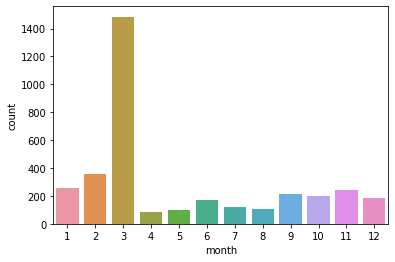

In [10]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
#plt.plot(tr_modified['left'])
sns.countplot('month', data=tr_modified)

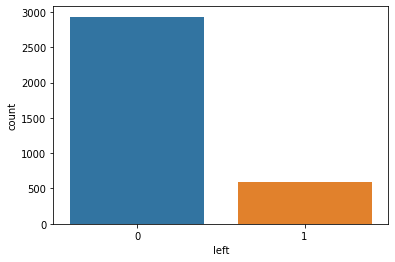

In [11]:
sns.countplot('left', data=tr_modified)

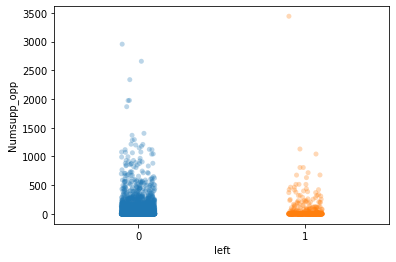

In [12]:
sns.stripplot(x='left',y='Numsupp_opp', data=tr_modified, alpha=0.3)

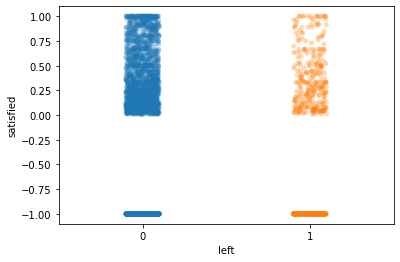

In [13]:
sns.stripplot(x='left',y='satisfied', data=tr_modified, alpha=0.3)

In [14]:
phcv = tr_modified[tr_modified["comp"]=="phcvroct"]

#phcv[(phcv["no_of_ratings"]<100) & (phcv["no_of_ratings"]>50)]
#phcv[(phcv["lastratingdate"]==pd.to_datetime('2017-3-20'))].head(50)
phcv[(phcv["num_remark"]==0)].head(50)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(phcv)

,id,emp,comp,lastratingdate,left,cumm_rating,satisfied,unsatisfied,no_of_ratings,supp_opp,Numsupp_opp,year,month,day,average_len_remark,num_opp,num_supp,num_remark
0,2228,939,phcvroct,2016-10-17,1,3.000000,-1.000000,-1.000000,1,0.852136,0,2016,10,17,0.0,0,0,0
18,2135,726,phcvroct,2016-10-08,1,3.666667,0.666667,-1.000000,12,1.000000,2,2016,10,8,0.0,0,2,0
31,1973,349,phcvroct,2017-01-16,0,4.000000,-1.000000,-1.000000,1,0.852136,0,2017,1,16,0.0,0,0,0
44,2029,470,phcvroct,2015-08-21,1,3.000000,-1.000000,-1.000000,1,1.000000,1,2015,8,21,0.0,0,1,0
59,2207,900,phcvroct,2016-03-11,1,2.800000,-1.000000,-1.000000,5,0.852136,0,2016,3,11,0.0,0,0,0
60,1985,372,phcvroct,2016-01-02,1,2.250000,-1.000000,0.500000,12,1.000000,1,2016,1,2,0.0,0,1,0
73,1902,238,phcvroct,2015-05-14,1,3.166667,-1.000000,-1.000000,6,0.852136,0,2015,5,14,0.0,0,0,0
90,2182,859,phcvroct,2016-01-10,1,3.936170,0.936170,-1.000000,47,1.000000,30,2016,1,10,0.0,0,30,0
102,2138,738,phcvroct,2017-02-15,0,2.000000,-1.000000,0.875000,24,1.000000,4,2017,2,15,0.0,0,4,0
112,2127,677,phcvroct,2017-02-03,0,3.222222,0.333333,-1.000000,9,1.000000,1,2017,2,3,0.0,0,1,0


In [15]:
#phcv[phcv["no_of_ratings"]<5].tail(50)

In [16]:
print(phcv[(phcv["year"]==2015)&(phcv["left"]==1)].shape)
print(phcv[(phcv["year"]==2015)].shape)

print(phcv[(phcv["year"]==2016)&(phcv["left"]==1)].shape)
print(phcv[(phcv["year"]==2016)].shape)

print(phcv[(phcv["year"]==2017)&(phcv["left"]==1)].shape)
print(phcv[(phcv["year"]==2017)].shape)

phcv[(phcv["year"]==2015)].head(50)



(60, 18)
(85, 18)
(126, 18)
(179, 18)
(44, 18)
(207, 18)


,id,emp,comp,lastratingdate,left,cumm_rating,satisfied,unsatisfied,no_of_ratings,supp_opp,Numsupp_opp,year,month,day,average_len_remark,num_opp,num_supp,num_remark
44,2029,470,phcvroct,2015-08-21,1,3.000000,-1.000000,-1.000000,1,1.000000,1,2015,8,21,0.000000,0,1,0
73,1902,238,phcvroct,2015-05-14,1,3.166667,-1.000000,-1.000000,6,0.852136,0,2015,5,14,0.000000,0,0,0
86,2005,421,phcvroct,2015-03-19,0,3.916667,0.916667,-1.000000,12,1.000000,19,2015,3,19,36.090909,0,19,11
120,1947,298,phcvroct,2015-12-11,1,2.034483,0.120690,0.586207,58,0.852136,0,2015,12,11,0.000000,0,0,0
151,1951,307,phcvroct,2015-08-14,1,3.888889,0.888889,-1.000000,9,0.852136,0,2015,8,14,0.000000,0,0,0
174,2032,473,phcvroct,2015-10-28,1,3.210526,0.421053,0.105263,19,0.852136,0,2015,10,28,0.000000,0,0,0
254,1967,340,phcvroct,2015-06-14,0,2.625000,-1.000000,0.437500,16,1.000000,14,2015,6,14,23.866667,0,14,15
257,1992,392,phcvroct,2015-05-03,0,3.000000,-1.000000,-1.000000,1,0.852136,0,2015,5,3,0.000000,0,0,0
308,1931,275,phcvroct,2015-03-27,1,2.200000,-1.000000,0.600000,5,0.852136,0,2015,3,27,0.000000,0,0,0
402,1946,296,phcvroct,2015-05-26,1,2.333333,-1.000000,-1.000000,3,1.000000,2,2015,5,26,183.000000,0,2,2
